In [20]:
import pandas as pd
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 500)

In [22]:
#filePath = 'data/arc2yeardata.xlsx'
filePath = '/Volumes/OM/ECO/M&V/Holiday Shutdowns/Memorial Day 2018/Archive/Campus Data 052918.csv'
#data = pd.read_excel(filePath, header=0, index_col=0, parse_date=True)
data = pd.read_csv(filePath, header=0, index_col=0, parse_dates=True)
print(data.columns)

Index([u'chw_tonh', u'steam_klb', u'OAT'], dtype='object')


In [23]:
%load_ext autoreload
%autoreload 2

import sys
toolPath = r'/Users/decolvin/Box Sync/UCD_ECO_coding/mypy'
sys.path.append(toolPath)

import mnv
import matplotlib.pyplot as plt
print("Success!")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Success!


In [24]:
data.head()

,chw_tonh,steam_klb,OAT
DateTime,,,
2016-01-01 00:00:00,1099.289196,166.133731,40.409643
2016-01-01 01:00:00,1341.298794,168.051633,40.079128
2016-01-01 02:00:00,770.730609,166.059831,40.090998
2016-01-01 03:00:00,812.078312,170.856988,40.114107
2016-01-01 04:00:00,862.013005,177.357802,39.902123


Q(75%): 5671.15 Q(25%): 1437.99
IQR value is 4233.16
Ceiling adjusted by IQR - Now 22603.79
0


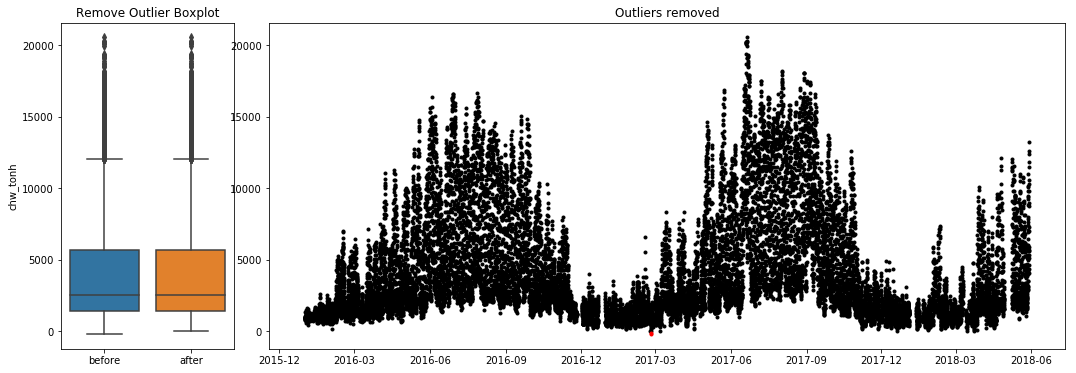

In [33]:
inputDict = {'IQRmult' : 4.0,
                 'IQR' : 'y',
                 'ceiling' : 50000,
                 'floor' : 0,
                 'resampleRate' : 'D',
                 'verbosity' : 3,
                 'sliceType' : 'ranges', #half, middate, ranges
                 'midDate' : '2018-01-01', #only needed with sliceType : 'middate'
                 'dateRanges' : ['2017-01-01','2018-01-01','2016-01-01','2017-01-01'], #only needed with sliceType : 'ranges'
                 'OATname' : None,
                 'OATsource' : 'file'} #only needed with sliceType : 'ranges'}

dc = mnv.data_handler(data[data.columns[0]], inputDict)
dc.default_clean()

# Run this incase the y-range is FUBAR
#dc.outlier_plot(dc.modifiedData[dc.com]) 

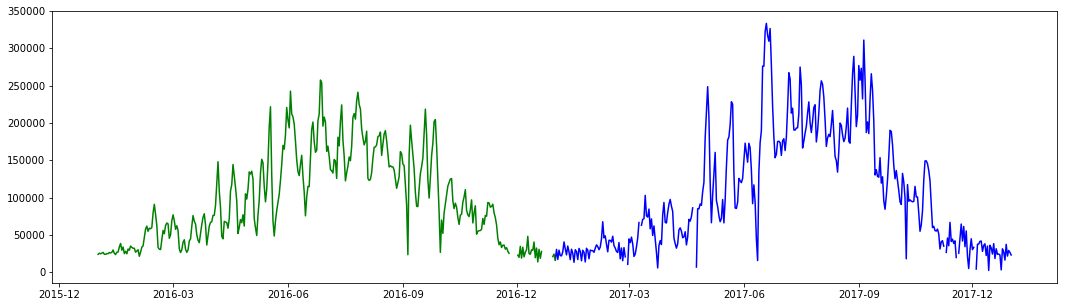

In [34]:
fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot(111)
ax.plot(dc.pre[dc.com],color='b')
ax.plot(dc.post[dc.com],color='g')
plt.show()

In [35]:
dc.pre.columns

Index([u'chw_tonh', u'HDH', u'CDH', u'HDH2', u'CDH2', u'year', u'month', u'day', u'hour', u'minute', u'weekday', u'daytime', u'weekend', u'saturday', u'sunday'], dtype='object')

In [36]:
allmod = mnv.many_ols(dc.pre, dc.post, inputParams=['', 'C(month)', 'C(hour)','C(weekend)','C(daytime)'])

allmod.run_all_linear()
print(allmod.statsPool[0:5])
#allmod.plot_pool(2)
topParams = allmod.statsPool.iloc[0]['params']

Could not complete model with CDH + HDH + C(month)
Error converting data to categorical: observation with value 10 does not match any of the expected levels (expected: [1, 2, ..., 8, 9])
    chw_tonh~CDH + HDH + C(month)
                         ^^^^^^^^
Could not complete model with CDH + HDH + C(month)
Error converting data to categorical: observation with value 10 does not match any of the expected levels (expected: [1, 2, ..., 8, 9])
    chw_tonh~CDH + HDH + C(month)
                         ^^^^^^^^
Could not complete model with CDH + HDH + C(month) + C(hour)
Error converting data to categorical: observation with value 10 does not match any of the expected levels (expected: [1, 2, ..., 8, 9])
    chw_tonh~CDH + HDH + C(month) + C(hour)
                         ^^^^^^^^
Could not complete model with CDH + HDH + C(month) + C(weekend)
Error converting data to categorical: observation with value 10 does not match any of the expected levels (expected: [1, 2, ..., 8, 9])
    chw_tonh~CD

Could not complete model with CDH + C(month)
Error converting data to categorical: observation with value 10 does not match any of the expected levels (expected: [1, 2, ..., 8, 9])
    chw_tonh~CDH + C(month)
                   ^^^^^^^^
Could not complete model with CDH + C(month) + C(hour)
Error converting data to categorical: observation with value 10 does not match any of the expected levels (expected: [1, 2, ..., 8, 9])
    chw_tonh~CDH + C(month) + C(hour)
                   ^^^^^^^^
Could not complete model with CDH + C(month) + C(weekend)
Error converting data to categorical: observation with value 10 does not match any of the expected levels (expected: [1, 2, ..., 8, 9])
    chw_tonh~CDH + C(month) + C(weekend)
                   ^^^^^^^^
Could not complete model with CDH + C(month) + C(daytime)
Error converting data to categorical: observation with value 10 does not match any of the expected levels (expected: [1, 2, ..., 8, 9])
    chw_tonh~CDH + C(month) + C(daytime)
        

Could not complete model with CDH2 + HDH2 + C(month)
Error converting data to categorical: observation with value 10 does not match any of the expected levels (expected: [1, 2, ..., 8, 9])
    chw_tonh~CDH2 + HDH2 + C(month)
                           ^^^^^^^^
Could not complete model with CDH2 + HDH2 + C(month)
Error converting data to categorical: observation with value 10 does not match any of the expected levels (expected: [1, 2, ..., 8, 9])
    chw_tonh~CDH2 + HDH2 + C(month)
                           ^^^^^^^^
Could not complete model with CDH2 + HDH2 + C(month) + C(hour)
Error converting data to categorical: observation with value 10 does not match any of the expected levels (expected: [1, 2, ..., 8, 9])
    chw_tonh~CDH2 + HDH2 + C(month) + C(hour)
                           ^^^^^^^^
Could not complete model with CDH2 + HDH2 + C(month) + C(weekend)
Error converting data to categorical: observation with value 10 does not match any of the expected levels (expected: [1, 2, ..., 8,

Could not complete model with HDH + C(month)
Error converting data to categorical: observation with value 10 does not match any of the expected levels (expected: [1, 2, ..., 8, 9])
    chw_tonh~HDH + C(month)
                   ^^^^^^^^
Could not complete model with HDH + C(month) + C(hour)
Error converting data to categorical: observation with value 10 does not match any of the expected levels (expected: [1, 2, ..., 8, 9])
    chw_tonh~HDH + C(month) + C(hour)
                   ^^^^^^^^
Could not complete model with HDH + C(month) + C(weekend)
Error converting data to categorical: observation with value 10 does not match any of the expected levels (expected: [1, 2, ..., 8, 9])
    chw_tonh~HDH + C(month) + C(weekend)
                   ^^^^^^^^
Could not complete model with HDH + C(month) + C(daytime)
Error converting data to categorical: observation with value 10 does not match any of the expected levels (expected: [1, 2, ..., 8, 9])
    chw_tonh~HDH + C(month) + C(daytime)
        

Could not complete model with C(month) + C(hour)
Error converting data to categorical: observation with value 10 does not match any of the expected levels (expected: [1, 2, ..., 8, 9])
    chw_tonh~C(month) + C(hour)
             ^^^^^^^^
Could not complete model with C(month) + C(weekend)
Error converting data to categorical: observation with value 10 does not match any of the expected levels (expected: [1, 2, ..., 8, 9])
    chw_tonh~C(month) + C(weekend)
             ^^^^^^^^
Could not complete model with C(month) + C(daytime)
Error converting data to categorical: observation with value 10 does not match any of the expected levels (expected: [1, 2, ..., 8, 9])
    chw_tonh~C(month) + C(daytime)
             ^^^^^^^^
Could not complete model with C(month) + C(hour) + C(weekend)
Error converting data to categorical: observation with value 10 does not match any of the expected levels (expected: [1, 2, ..., 8, 9])
    chw_tonh~C(month) + C(hour) + C(weekend)
             ^^^^^^^^
Could 

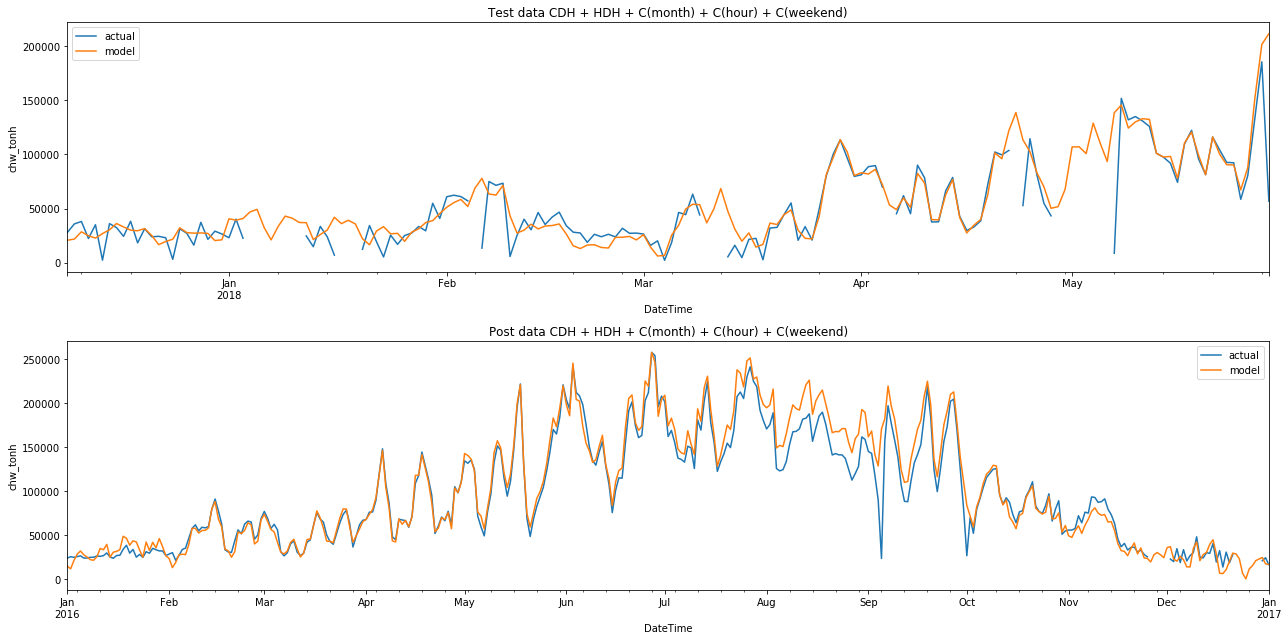

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               chw_tonh   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     546.5
Date:                Fri, 01 Jun 2018   Prob (F-statistic):          7.97e-214
Time:                        15:06:20   Log-Likelihood:                -3707.3
No. Observations:                 335   AIC:                             7445.
Df Residuals:                     320   BIC:                             7502.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        6.805e+04   6795.311     10.014      0.000    5.47e+04    8.14e+04
C(month)[T.2]   -5762.7898   4729.688     -1.218      0.224   -1.51e+04    3542.421
C(month)[T.3]   -6083.4446   5368.744     -1.133      0.258   -1.66e+04    4479.049
C(month)[T.4]   -3696.5422   5766.646     -0.641      0.522    -1.5e+04    7648.785
C(month)[T.5]    8996.1228   6354.116      1.416      0.158   -3504.996    2.15e+04
C(month)[T.6]    7123.3215   6742.685      1.056      0.292   -6142.270    2.04e+04
C(month)[T.7]    2.021e+04   6991.592      2.891      0.004    6456.475     3.4e+04
C(month)[T.8]    3.255e+04   6934.670      4.694      0.000    1.89e+04    4.62e+04
C(month)[T.9]    2.625e+04   6825.450      3.846      0.000    1.28e+04    3.97e+04
C(month)[T.10]   6570.3427   6162.653      1.066      0.287   -5554.092    1.87e+04
C(month)[T.11]  -4729.6102   5094.530     -0.928      0.354   -1.48e+04    5293.393
C(month)[T.12]  -2563.3081   6744.420     -0.380      0.704   -1.58e+04    1.07e+04
C(weekend)[T.1] -7431.0225   1946.297     -3.818      0.000   -1.13e+04   -3601.868
CDH               379.6939     10.983     34.572      0.000     358.086     401.301
HDH              -104.3996     16.041     -6.508      0.000    -135.958     -72.841
==============================================================================
Omnibus:                      188.029   Durbin-Watson:                   1.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2438.895
Skew:                          -2.031   Prob(JB):                         0.00
Kurtosis:                      15.579   Cond. No.                     4.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
params = topParams
mod = mnv.ols_model(dc.pre, dc.post, params)
mod.model_plot()
plt.show()
mod.Fit.summary()

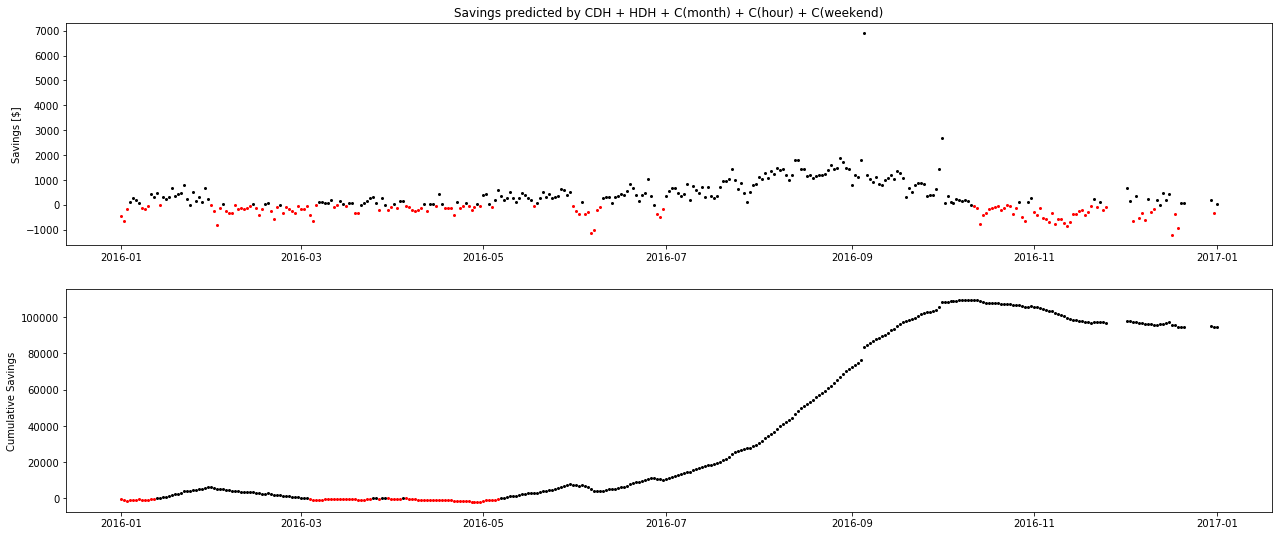

94652.7765214


In [19]:
rates = {'chw':0.047, 'steam':0.0157, 'elec':0.065} #kBTU prices for 2016(?)
commodity = 'chw'

mod.savings_plot(yaxis='dollars', rate=rates[commodity])
print(mod.postCumsum * rates[commodity])